### Logistic regression

Subject: Artificial Intelligence

Dates: 2020-10-01

Department of Computer Science, Hanyang University

Instructor: Yung-Kyun Noh

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def draw_state(wval, bval, title_str='Data'):
    # function for scattering data and drawing classification boundary
    # wx - b > 0 or  wx - b < 0
    
    # create a figure and axis
    fig, ax = plt.subplots()

    # Scatter data points in 2-dimensional space
    ax.scatter(data1[:,0], data1[:,1], label='class 1', c='red', alpha=.3)
    ax.scatter(data2[:,0], data2[:,1], label='class 2', marker='^', c='blue', alpha=.3)
    # set a title and labels
    ax.set_title(title_str)
    ax.legend()
    
    [x1min,x1max,x2min,x2max] = ax.axis()
    x1vals = np.arange(x1min,x1max,0.1)
    ax.plot(x1vals, (-wval[0]*x1vals + bval)/wval[1], 'k')
    ax.axis([x1min,x1max,x2min,x2max])
    ax.grid()


In [13]:
def logistic_function(t):
    # example: logistic_function(np.array([0,1,2]))
    
    ret_val = 1/(1 + np.exp(-t))
    return ret_val

In [14]:
def get_loss(labels, fs):
    loss_val = np.sum(labels*np.log(fs) + (1 - labels)*np.log(1 - fs))
    return loss_val

### Data generation

In [15]:
# generate two Gaussians (class 1 & class 2)
dim = 2
datanum1 = 50
datanum2 = 50
mean1 = np.array([0, 0])
mean2 = np.array([1, -.5])
cov1 = np.array([[.1,.02],[.02,.1]])
cov2 = np.array([[.1,.02],[.02,.1]])
data1 = np.random.multivariate_normal(mean1, cov1, datanum1)
data2 = np.random.multivariate_normal(mean2, cov2, datanum2)
tstdatanum1 = 100
tstdatanum2 = 100
tstdata1 = np.random.multivariate_normal(mean1, cov1, tstdatanum1)
tstdata2 = np.random.multivariate_normal(mean2, cov2, tstdatanum2)


### Optimal Bayes classifier

When the data generating functions are Gaussians having the equivalent covariances, we can obtain the optimal linear classifier.

[-11.45833333   7.29166667] -7.552083333333334


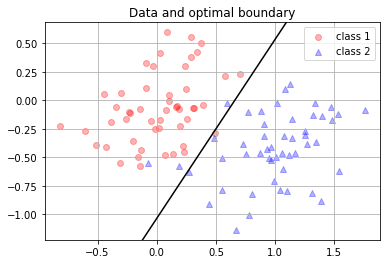

In [16]:
# optimal linear classifier
optw = np.matmul(mean1 - mean2, np.linalg.inv(cov1))
optb = np.matmul(optw, (mean1 + mean2)/2)
print(optw, optb)

draw_state(optw, optb, 'Data and optimal boundary')

### Learning

In [17]:
# Initialize parameters
w_init = np.random.normal(0,1,dim)
b_init = np.random.normal(0,1,1)

# extended w: [w, -b]
extw = np.array([np.concatenate((w_init, -b_init))])
# data with '1' is appended: [X, 1]
extX = np.concatenate((np.concatenate((data1, data2), axis=0), \
                       np.ones([datanum1 + datanum2, 1])), axis=1)
labels = np.concatenate((np.ones(datanum1), np.zeros(datanum2)))  # label of class 1: 1, label of class 2: 0


In [18]:
def update_w(extw, extX, num_update=100, step_size=0.001, reg_const=1):
    draw_state(extw[0,0:2], -extw[0,2], 'Before update')

    objective_history = []
    for i in range(num_update):
        ts = np.matmul(extX, extw.T)  # w^TX
        fs = logistic_function(ts)
        extw = extw + step_size*(np.matmul(np.array([labels]) - fs.T, extX) - reg_const*extw)
        objective_history.append(get_loss(labels, fs.T[0]))

    draw_state(extw[0,0:2], -extw[0,2], 'Updated boundary')
    
    fig, ax = plt.subplots()
    ax.plot(objective_history)
    ax.set_title("objective function")
    
    return extw


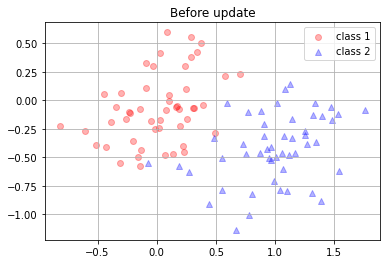

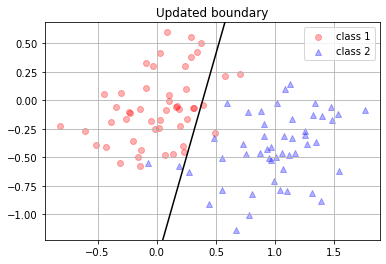

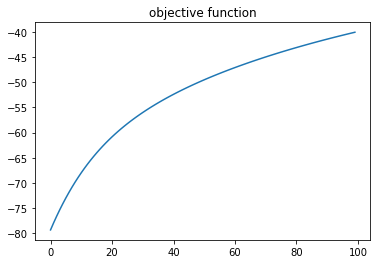

In [19]:
extw = update_w(extw, extX, num_update=100, step_size=0.001, reg_const=0)

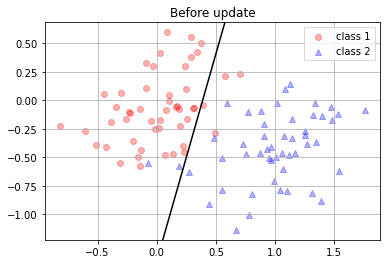

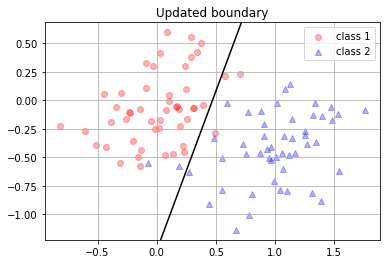

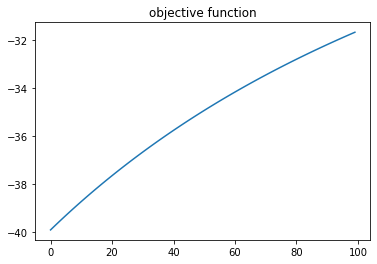

In [20]:
# Additional 100 updates
extw = update_w(extw, extX)

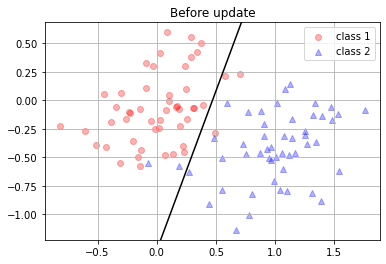

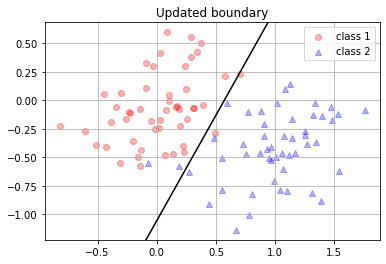

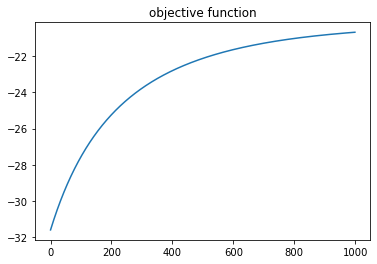

In [21]:
# After enough updates
extw = update_w(extw, extX, num_update=1000)

#### Evaluation

In [22]:
# data with '1' is appended: [X, 1]
extTstX = np.concatenate((np.concatenate((tstdata1, tstdata2), axis=0), \
                       np.ones([tstdatanum1 + tstdatanum2, 1])), axis=1)
labels = np.concatenate((np.ones(tstdatanum1), np.zeros(tstdatanum2)))

ts = np.matmul(extTstX, extw.T)  # w^TX
err_rate = np.sum(np.abs((ts.T > 0) - np.array([labels])))/(tstdatanum1 + tstdatanum2)
print(err_rate)

0.045
